In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Scales the features with MinMaxScaler

Splits the data

Trains all three classifiers

Evaluates them using F1 score.

LogisticRegression → simple linear model for classification.

SVC → Support Vector Classifier; works well for high-dimensional binary data.

MLPClassifier → Multi-layer Perceptron (neural network); can capture non-linear patterns.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


preparing features (X) and target (y) for a machine learning model

In [5]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)

In [6]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


scaling all your features to a 0–1 range using MinMaxScaler.

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

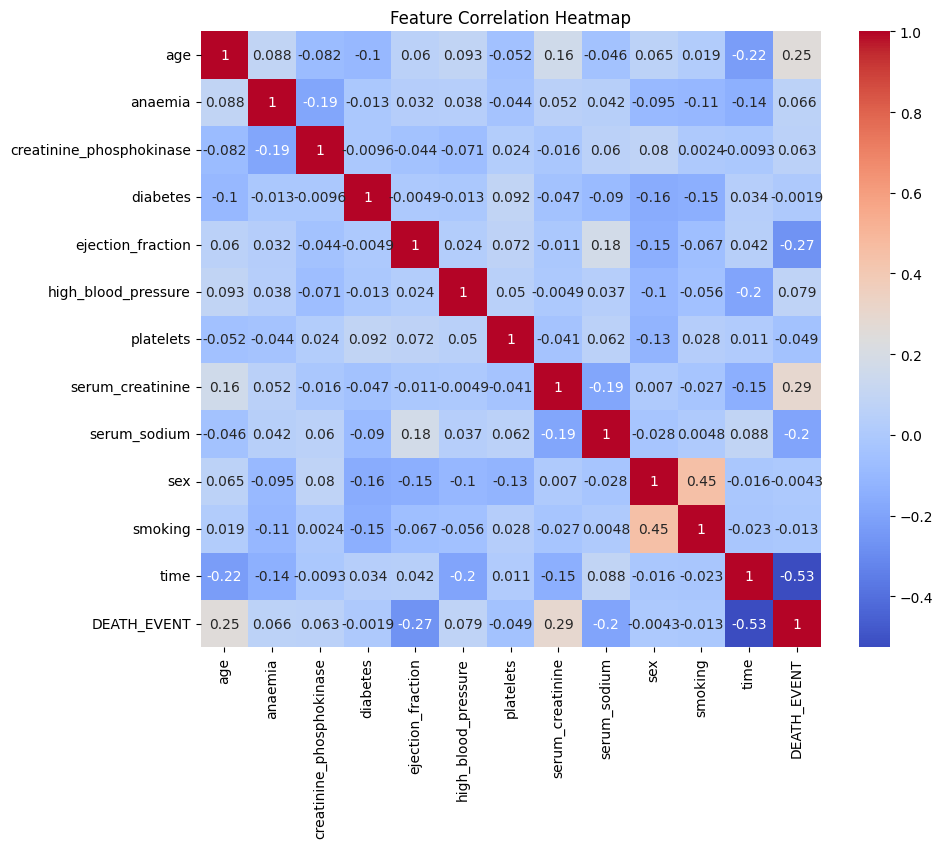

In [8]:

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


converting scaled NumPy array X back into a pandas DataFrame.

What this does:

X after MinMaxScaler is a NumPy array, which has no column names.

pd.DataFrame(X) creates a tabular view so you can inspect it like a DataFrame.

All values will be between 0 and 1 because you scaled them.

In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


### splitting dataset into training and testing sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Logistic Regression model and computed its performance metrics.

log_acc → accuracy: proportion of correct predictions.

log_f1 → F1 score: balances precision and recall (especially useful for imbalanced classes like death events).

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

log_acc = model.score(X_test, y_test)
log_f1 = f1_score(y_test, y_pred)

In [12]:
print("Logistic Regression Accuracy:", log_acc)
print("Logistic Regression F1 Score:", log_f1)

Logistic Regression Accuracy: 0.7888888888888889
Logistic Regression F1 Score: 0.6545454545454545


SVM classifier and calculated its performance.

svm_acc → proportion of correctly predicted cases (accuracy).

svm_f1 → F1 score, which balances precision and recall, useful if classes are imbalanced.

In [13]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

svm_acc = model.score(X_test, y_test)
svm_f1 = f1_score(y_test, y_pred)

In [14]:
print("SVM Accuracy:", svm_acc)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.7555555555555555
SVM F1 Score: 0.5416666666666667


MLPClassifier is trained correctly on the training set and evaluated on the test set.



In [15]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

nn_acc = model.score(X_test, y_test)
nn_f1 = f1_score(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print("MLP Classifier Accuracy:", nn_acc)
print("MLP Classifier F1 Score:", nn_f1)

MLP Classifier Accuracy: 0.8111111111111111
MLP Classifier F1 Score: 0.6909090909090908


### performance metrics for all three models.

In [17]:
print(f"Logistic Regression:\nAccuracy: {log_acc}\nF1 Score: {log_f1}\n")
print(f"Support Vector Machine:\nAccuracy: {svm_acc}\nF1 Score : {svm_f1}\n")
print(f"Neural Network:\nAccuracy: {nn_acc}\nF1 Score: {nn_f1}\n")

Logistic Regression:
Accuracy: 0.7888888888888889
F1 Score: 0.6545454545454545

Support Vector Machine:
Accuracy: 0.7555555555555555
F1 Score : 0.5416666666666667

Neural Network:
Accuracy: 0.8111111111111111
F1 Score: 0.6909090909090908



### visual comparison of Accuracy and F1 Score for the three models

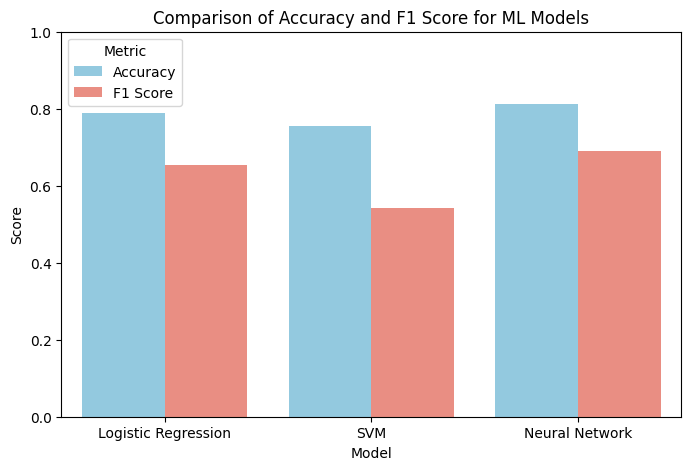

In [18]:
model_names = ['Logistic Regression', 'SVM', 'Neural Network']
accuracy_scores = [log_acc, svm_acc, nn_acc]
f1_scores = [log_f1, svm_f1, nn_f1]

df = pd.DataFrame({
    'Model': model_names * 2,
    'Score': accuracy_scores + f1_scores,
    'Metric': ['Accuracy']*3 + ['F1 Score']*3
})

custom_palette = {'Accuracy': 'skyblue', 'F1 Score': 'salmon'}

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Score', hue='Metric', data=df, palette=custom_palette)
plt.ylim(0,1)
plt.title('Comparison of Accuracy and F1 Score for ML Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

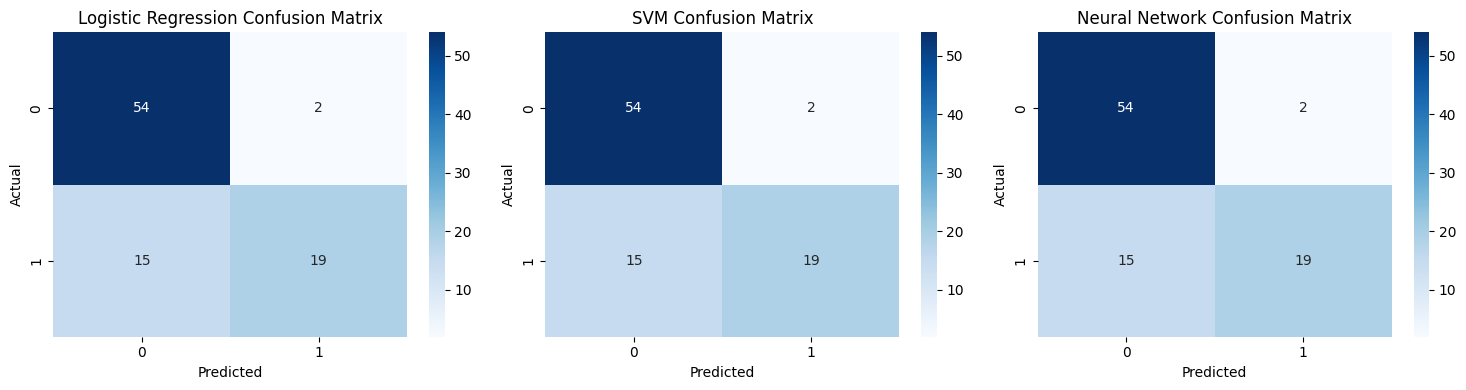

In [20]:
models = {
    'Logistic Regression': (log_acc, log_f1, model), 
    'SVM': (svm_acc, svm_f1, model), 
    'Neural Network': (nn_acc, nn_f1, model)
}

plt.figure(figsize=(15,4))
for i, (name, (acc, f1, mdl)) in enumerate(models.items(), 1):
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()